In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [73]:
dt=pd.read_csv('StudentsPerformance.csv')

In [74]:
dt.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group C,some high school,free/reduced,none,0,17,10
1,female,group B,high school,free/reduced,none,8,24,23
2,female,group B,some high school,free/reduced,none,18,32,28
3,female,group B,some college,standard,none,11,38,32
4,female,group C,some college,free/reduced,none,22,39,33


# 1. Find out how many males and females participated in the test.

In [4]:
dt['gender'].value_counts()

female    518
male      482
Name: gender, dtype: int64

# 2. What do you think about the students' parental level of education?

<AxesSubplot:xlabel='parental level of education'>

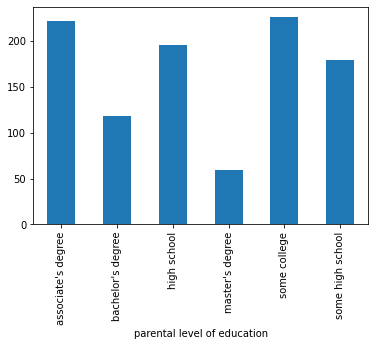

In [5]:
dt.groupby('parental level of education').size().plot(kind='bar')

# 3. Who scores the most on average for math, reading and writing based on


# ● Gender

In [6]:
dg=dt.groupby('gender')['math score'].mean()
dg.nlargest(1)

gender
male    68.821577
Name: math score, dtype: float64

In [7]:
dw=dt.groupby('gender')['writing score'].mean()
dw.nlargest(1)

gender
female    72.467181
Name: writing score, dtype: float64

In [8]:
dr=dt.groupby('gender')['reading score'].mean()
dr.nlargest(1)

gender
female    72.590734
Name: reading score, dtype: float64

# ● Test preparation course

In [9]:
ts=dt.groupby('test preparation course')[['math score','writing score','reading score']].mean()
ts.sort_values(['math score','writing score','reading score'],ascending=[False,False,False])
ts.head(1)

,math score,writing score,reading score
test preparation course,,,
completed,69.96648,74.684358,74.175978


# 4. What do you think about the scoring variation for math, reading and writing based on

# ● Gender

In [10]:
dt[['gender','math score','writing score','reading score']].groupby(['gender']).agg('var')

,math score,writing score,reading score
gender,,,
female,256.958593,220.369327,207.677438
male,211.889097,202.413924,200.211010


# ● Test preparation course

In [11]:
dt[['test preparation course','math score','writing score','reading score']].groupby(['test preparation course']).agg('var')

,math score,writing score,reading score
test preparation course,,,
completed,210.884027,175.202612,183.265864
none,246.668662,226.251739,213.419851


# 5. The management needs your help to give bonus points to the top 25% of students based on their maths score, so how will you help the management to achieve this.

In [71]:
dt.sort_values(by='math score',ascending=False,inplace=True)
dm=pd.DataFrame(dt)
n=len(dm)
q1=int((1*n+1)/4)
print(q1)
df=dm[:q1]
df

250


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
999,male,group E,bachelor's degree,standard,completed,100,100,100
515,female,group E,some college,standard,none,100,92,97
517,female,group E,associate's degree,standard,none,100,100,100
516,female,group E,bachelor's degree,standard,none,100,100,100
997,male,group D,some college,standard,completed,100,97,99
...,...,...,...,...,...,...,...,...
429,female,group E,some high school,standard,none,77,79,80
428,female,group D,some college,free/reduced,none,77,86,86
418,female,group B,high school,standard,completed,77,82,89
420,female,group C,bachelor's degree,standard,completed,77,94,95
